### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [258]:
data = pd.read_csv('data/coupons.csv')

In [259]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [260]:
data.info()
df=data
missing_data = df.isnull().sum().sort_values()
missing_data
#plt.plot(data=missing_data, kind = 'bar')

### Observation:  we have found that we miss quite a bit data  out to 12684 entries, we missed 12576 car info"
# Y                           0
# Bar                       107
#  RestaurantLessThan20      130
# CarryAway                 151
# Restaurant20To50          189
#. CoffeeHouse               217
# car                     12576 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [261]:
#### 1. we will drop the car column: given the fact out to 12684 entries, we missed 12576 car info,  
# for the bar, restaurant, carryaway, coffee house, we missed abour 100-200 (each, not sure if overlapping) entries
# out to 12567.  we will drop the missing data row 

data_1=data.drop("car", axis=1).dropna()
data_1.info()
# great, we got the non-nul 12079 entries, without the car column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

4. What proportion of the total observations chose to accept the coupon? 



In [262]:
# calculate proportion of the total observations chose to accept the coupon, 
#### Observation:  we find out 6877 accepted, 56.9% accepted the coupon!
total=12079
data_1['Y'].sum()/total


0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

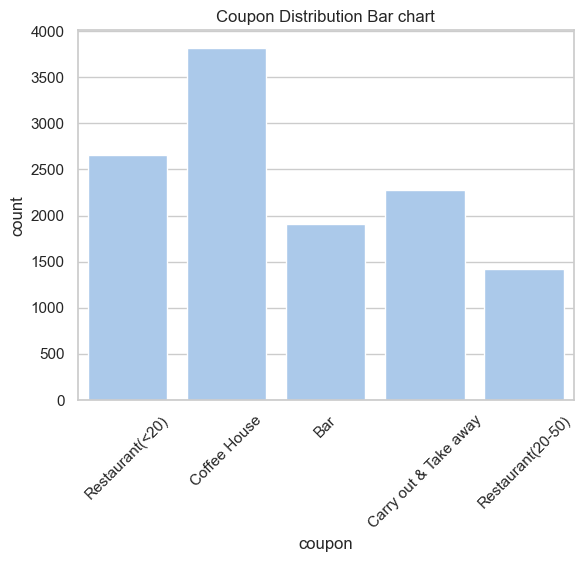

In [263]:
#first take a look at what coupon column looks like by  using data_1['coupon'].unique()  
#realizing it is an dataframe object with differnt types -- array(['Restaurant(<20)', 
#'Coffee House', 'Bar', 'Carry out & Take away', 'Restaurant(20-50)'], dtype=object)
#then I know I need to use sns.countplot to plot the coupon column


sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

data_1['coupon'].unique()
sns.countplot(data=data_1, x='coupon',label="coupon", color="b")
plt.xticks(rotation=45)
plt.title('Coupon Distribution Bar chart')
# Display the plot
plt.show()

6. Use a histogram to visualize the temperature column.

In [264]:
#first take a look at the temperature data
data_1['temperature'].unique()

array([55, 80, 30])

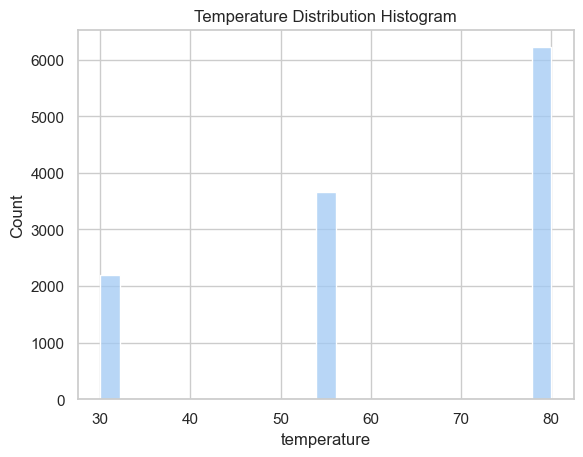

In [265]:
#plot the histogram of temperature
sns.histplot(data=data_1, x='temperature',label="temperature", color="b")

plt.title('Temperature Distribution Histogram')
# Display the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [266]:
df_bar= data_1[data_1['coupon'] == 'Bar']
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null 

2. What proportion of bar coupons were accepted?


In [267]:
# the total amount of users are 1913, checking how many yes ("y" value sum)
#### find the ratio = 0.41191845269210664, i.e.,   41.19% bar coupons were accepted   
total =1913
df_bar['Y'].sum()/total

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


ratio for group_more_than3 is 0.7616580310880829
ratio for group_less_than3 is 0.37267441860465117


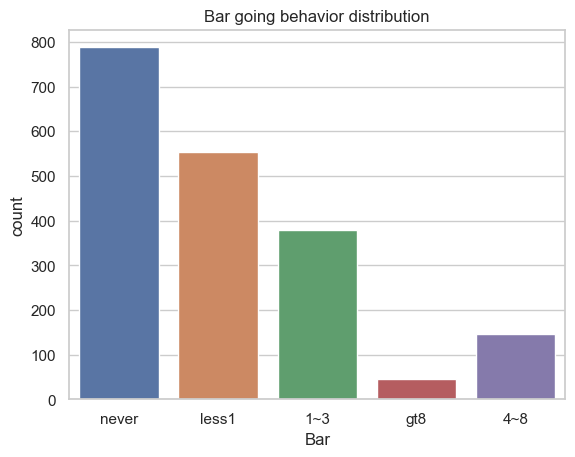

In [268]:
#first take a look at the bar data,  ah, it is array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)
df_bar['Bar'].unique()
group_more_than3= df_bar[(df_bar['Bar'] == 'gt8' )|(df_bar['Bar'] == '4~8' )]
group_less_than3= df_bar[(df_bar['Bar'] == 'never' )|(df_bar['Bar'] == 'less1' )|(df_bar['Bar'] == '1~3' )]
# take a look at the data just to be sure, looks like 193 go to bar >3, 1720 less, they add up

def ratio(x):
    total =len(x)  # find the group total
    ratio= x['Y'].sum()/total
    return(ratio)

print('ratio for group_more_than3 is', ratio(group_more_than3))
print('ratio for group_less_than3 is', ratio(group_less_than3))
sns.countplot(data=df_bar, x='Bar')
plt.title('Bar going behavior distribution')
plt.show()

# Summary of results are not surprsing  76% vs 37%  
# ratio for group_more_than3 is 0.7616580310880829
# ratio for group_less_than3 is 0.37267441860465117

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [269]:
# first take a look at the age data --
# they are groups --in object format: array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      
df_bar['age'].unique()
bar_filter = [ '1~3', 'gt8', '4~8']
age_filter = ['46', '26', '31', '41', '50plus', '36']
group_1= df_bar[((df_bar['Bar'].isin(bar_filter)) & (df_bar['age'].isin(age_filter))) ]
group_2= df_bar[((~df_bar['Bar'].isin(bar_filter)) | (~df_bar['age'].isin(age_filter))) ]
#take a look at the group date, 403 in group 1, 1510 in group2
#print (group__1.info(), group_2.info()) 

print('ratio for group_go to a bar more than once a month and are over the age of 25 is', ratio(group_1))
print('ratio for group_others is', ratio(group_2))

#ok, again reasonable
# ratio for group_go to a bar more than once a month and are over the age of 25 is 0.6898263027295285
# ratio for group_others is 0.33774834437086093

ratio for group_go to a bar more than once a month and are over the age of 25 is 0.6898263027295285
ratio for group_others is 0.33774834437086093


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


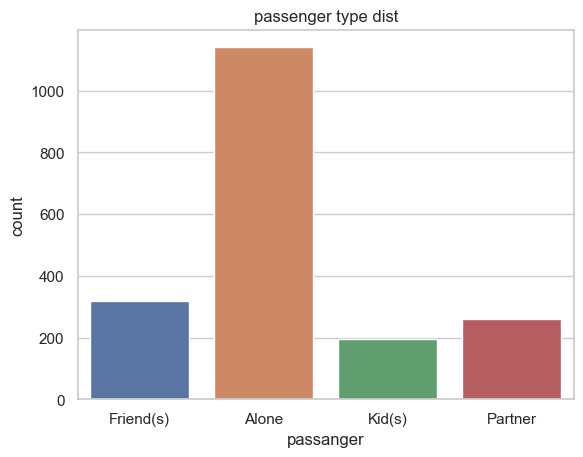

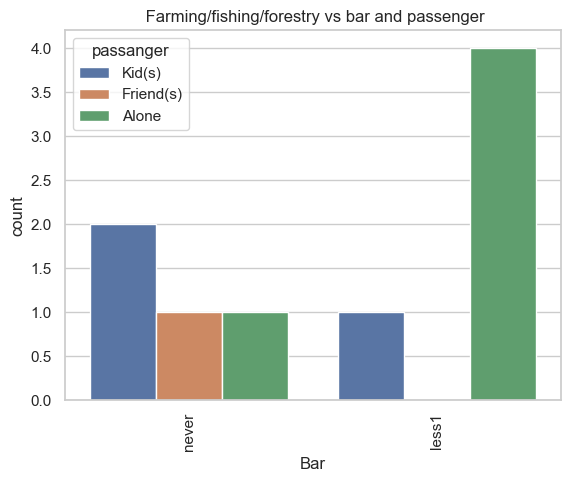

ratio for group_go to a bar more than once a month and have a non-kid passenger and not a fam/fish  is 0.7142857142857143
ratio for group_others is 0.37877030162412995


In [128]:
# first take a look at passenger data,  be aware the spelling fo the column is not the word "Passenger" !   



bar_filter = [ '1~3', 'gt8', '4~8']   # filter for people go to bar more than once a month
pass_filter = ['Friend(s)',  'Partner']   # filter for who had passenger not kid

# take a look at the passenger data
sns.countplot(data=df_bar, x= 'passanger')
plt.title('passenger type dist')
plt.show()

group_0=df_bar[( df_bar['Bar'].isin(bar_filter) ) & (df_bar['passanger'].isin(pass_filter) )]

df_bar_famer= df_bar[df_bar['occupation'] == 'Farming Fishing & Forestry']
sns.countplot(data=df_bar_famer, x = 'Bar', hue = "passanger")
plt.title(' Farming/fishing/forestry vs bar and passenger')
plt.xticks(rotation=90)
plt.show()

# so interesting!  the ''Farming Fishing & Forestry'' group do not go to bar more than once, hence the third filter did not change anything

              
group_1= group_0[(group_0['occupation']!= 'Farming Fishing & Forestry') ]

Not_in_group_1= df_bar[( ~df_bar['Bar'].isin(bar_filter) ) |(~df_bar['passanger'].isin(pass_filter) ) |(df_bar['occupation'] == 'Farming Fishing & Forestry') ]

print('ratio for group_go to a bar more than once a month and have a non-kid passenger and not a fam/fish  is', ratio(group_1))
print('ratio for group_others is', ratio(Not_in_group_1))

# Summary of the results
# ratio for group_go to a bar more than once a month and have a non-kid passenger  is 0.7142857142857143
# ratio for group_others is 0.41191845269210664


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



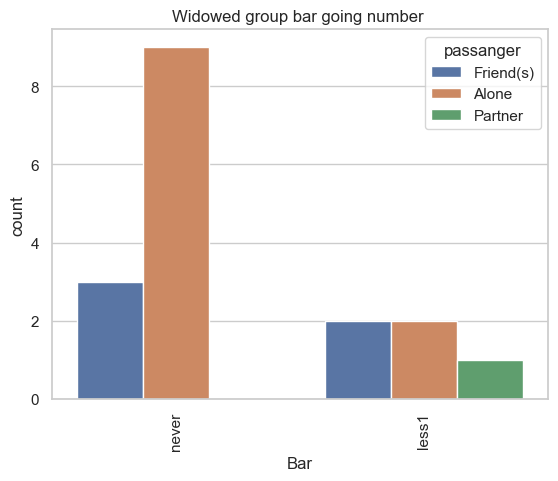

anyone from group_0 who is a widow?  Empty DataFrame
Columns: [destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y]
Index: []

[0 rows x 25 columns]
ratio for group_go to a bar more than once a month and have a non-kid passenger and not a widow is 0.7142857142857143
ratio for group_others is 0.37877030162412995
ratio for group_go to a bar o to bars more than once a month and are under the age of 30  0.7195121951219512
ratio for group_others is 0.3482649842271293
cheap restaurants more than 4 times a month and income is less than 50K rato is  0.45645645645645644
the others  0.40253164556962023


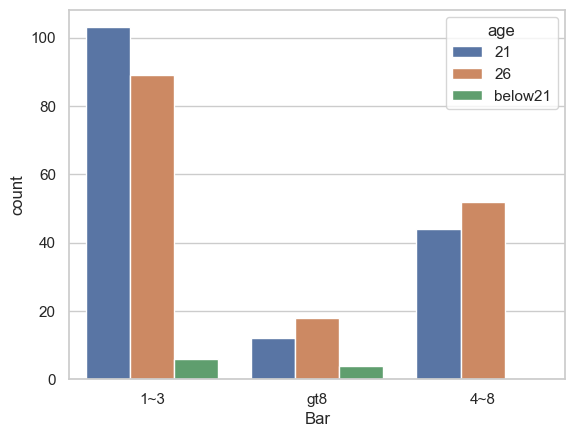

In [125]:
# first take a look the new data maritalStatus, RestaurantLessThan20 , income   
#  print(df_bar['maritalStatus'].unique()):   ['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
# print(df_bar['RestaurantLessThan20'].unique()):    ['4~8' '1~3' 'less1' 'gt8' 'never']
# print(df_bar['income'].unique()):   ['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
# '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
#  'Less than $12500']

#then create the filters

#group 1   go to bars more than once a month, had passengers that were not a kid, and were not widowed 
bar_filter = [ '1~3', 'gt8', '4~8']   # filter for people go to bar more than once a month
pass_filter = ['Friend(s)',  'Partner']   # filter for who had passenger not kid
mStatus_filter  = ['Widowed']  # negative filter needed here
group_0=df_bar[( df_bar['Bar'].isin(bar_filter) ) & (df_bar['passanger'].isin(pass_filter) )]
group_3= group_0[group_0['maritalStatus']!= 'Widowed' ]

New_notgroup_3= df_bar[( ~df_bar['Bar'].isin(bar_filter) ) | (~df_bar['passanger'].isin(pass_filter) ) |(df_bar['maritalStatus']== 'Widowed')]



#### looks like the not a widow filter did not narrow down the group at all
####  will look at the widowed data a bit more to make sure

df_bar_widowed= df_bar[df_bar['maritalStatus']== 'Widowed']
sns.countplot(data=df_bar_widowed, x = 'Bar', hue = "passanger")
plt.xticks(rotation=90)
plt.title('Widowed group bar going number ')
plt.show()

print ("anyone from group_0 who is a widow? ", group_0[group_0['maritalStatus']== 'Widowed' ])
# anyone from group_0 who is a widow? result:= Empty DataFrame

print('ratio for group_go to a bar more than once a month and have a non-kid passenger and not a widow is', ratio(group_1))
print('ratio for group_others is', ratio(New_notgroup_3) )


# Second group  go to bars more than once a month and are under the age of 30 
bar_filter = [ '1~3', 'gt8', '4~8'] 
age_filter = ['21',  '26',  'below21']

group_4= df_bar[( df_bar['Bar'].isin(bar_filter) ) & (df_bar['age'].isin(age_filter) )]
sns.countplot(data=group_4, x = 'Bar', hue = "age")

not_ingroup_4= df_bar[( ~df_bar['Bar'].isin(bar_filter) ) | (~df_bar['age'].isin(age_filter) )]
print('ratio for group_go to a bar o to bars more than once a month and are under the age of 30 ', ratio(group_4))
print('ratio for group_others is', ratio(not_ingroup_4))

# third group go to cheap restaurants more than 4 times a month and income is less than 50K. 

cheapfood_filter = ['4~8', 'gt8']
income_filter =['$12500 - $24999', '$37500 - $49999', '$25000 - $37499', 'Less than $12500']

group_5 =df_bar[(df_bar['RestaurantLessThan20'].isin(cheapfood_filter)) & (df_bar['income'].isin(income_filter))]
Not_ingroup_5 =df_bar[(~df_bar['RestaurantLessThan20'].isin(cheapfood_filter)) | (~df_bar['income'].isin(income_filter))]
print('cheap restaurants more than 4 times a month and income is less than 50K rato is ', ratio(group_5) )
print('the others ', ratio(Not_ingroup_5))

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Observations/hypothesis about drivers who accepted the bar coupons
    1. The driving factor is driver's normal bar-going.   If the drivers go to bar more than once a month, they are much more likely to accept the Bar coupon. The acceptance ratio is around 69-71%, via the other group is around 34-40% 
     - ratio for group_go to a bar more than once a month and are over the age of 25 is 0.6898263027295285
  and ratio for group_others (ie, people who are not in this group) is 0.33774834437086093
  
     - ratio for group_go to a bar more than once a month and have a non-kid passenger  is 0.7142857142857143
 ratio for group_others(ie, people who are not in this group) is 0.41191845269210664
 
    - ratio for group_go to a bar more than once a month and have a non-kid passenger and not a widow is 0.7142857142857143, vs ratio for group_others is 0.37877030162412995
    
    - ratio for group_go to a bar o to bars more than once a month and are under the age of 30  0.7195121951219512,  vs ratio for group_others is 0.3482649842271293
 
 2. Cheap restaurants and income have a very small impact on the accepting bar coupon (5% difference)
    - cheap restaurants more than 4 times a month and income is less than 50K rato is  0.45645645645645644
the others  0.40253164556962023

3. Other side observations:  from the data, the widowed group is small and they never goes to the bar more than once a month


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

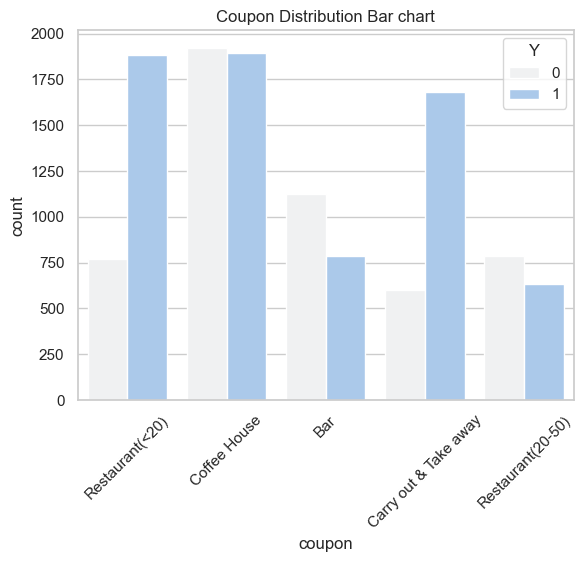

In [132]:
#### first look at the clean data set data_1  and make sure the data set was not changed accidentally
# data_1.info()    # ok looks good, still 12079 entries, total 25 columns with non-null values):


#### take a look at all the coupons and their acceptance rate 
sns.countplot(data=data_1, x='coupon', color="b", hue='Y')
plt.xticks(rotation=45)
plt.title('Coupon Distribution Bar chart')
# Display the plot
plt.show()

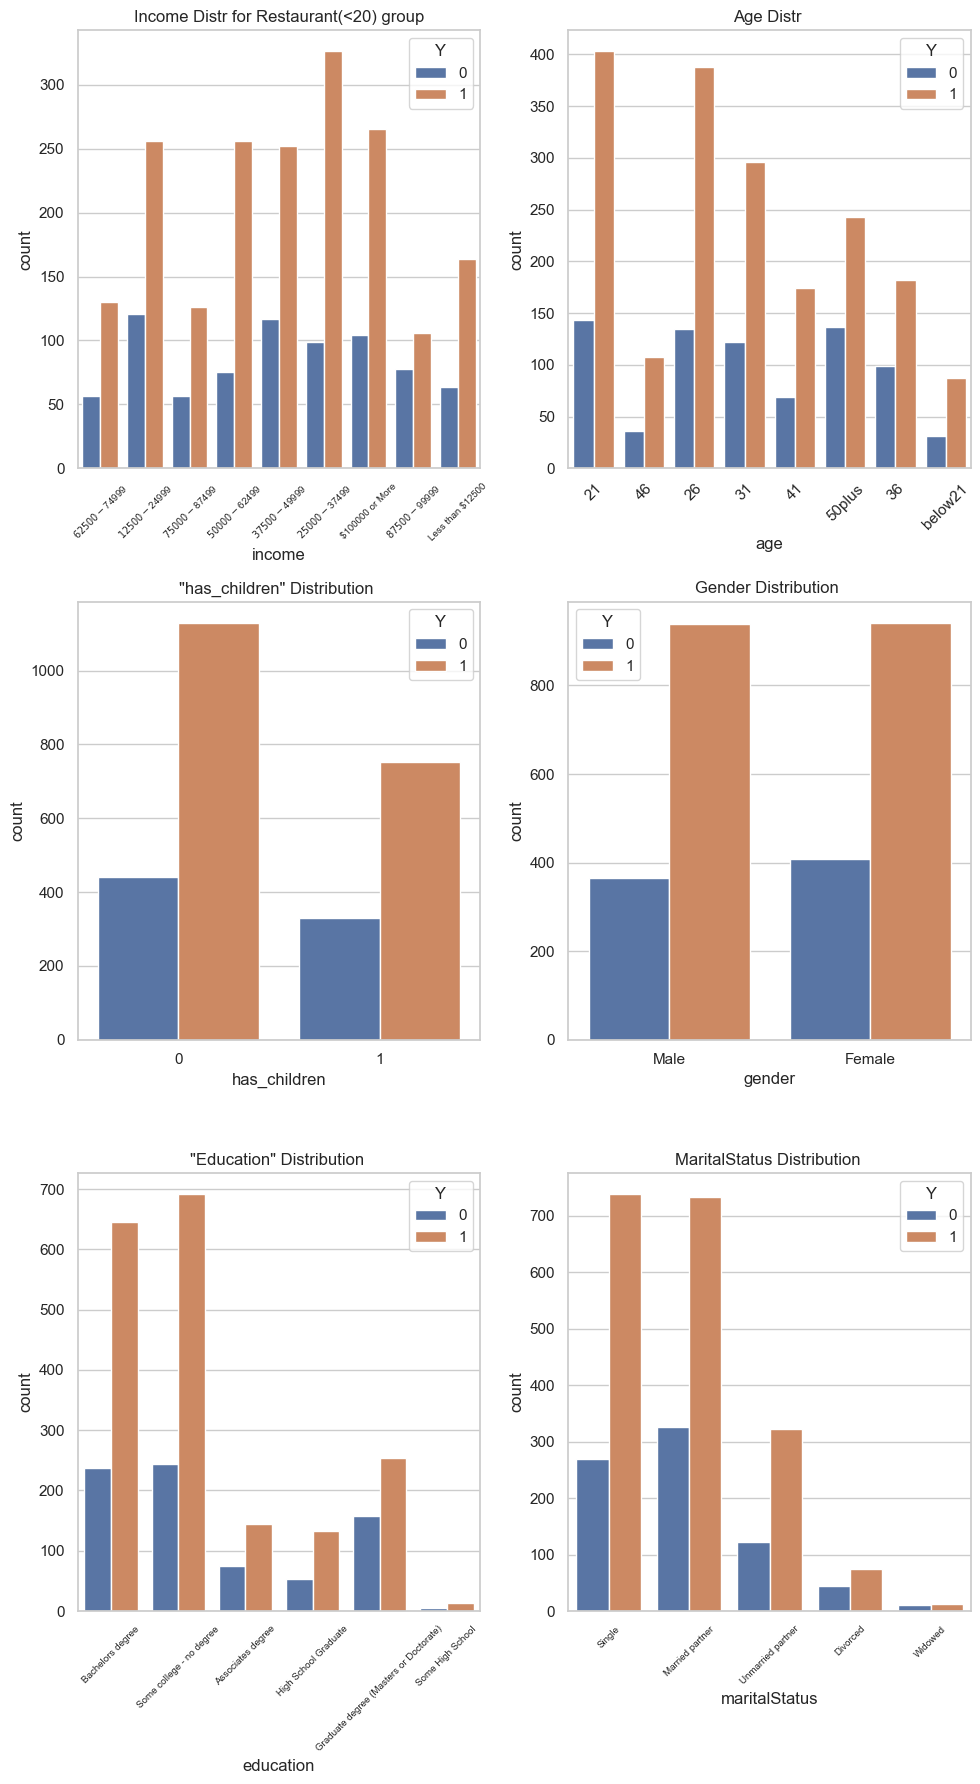

In [148]:
### decide to look at the "Restaurant(<20)" coupon since  it has a high acceptance rate, would be interesting to see what are the key drivers
df_1 = data_1[ data_1['coupon']== 'Restaurant(<20)' ]

### Create six subplots to observe demographics of the samples on age, income, gender, has children, education, marital status

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 18))
sns.countplot(data=df_1, x='income',  hue='Y', ax=axes[0, 0])
axes[0, 0].set_title('Income Distr for Restaurant(<20) group')
sns.countplot(data=df_1, x='age',  hue='Y',ax=axes[0, 1])
axes[0, 0].tick_params(axis='x', labelrotation=45,labelsize=7)  # Adjust the font size 
axes[0, 1].tick_params(axis='x', labelrotation=45)
axes[0, 1].set_title('Age Distr ')

sns.countplot(data=df_1, x='has_children',  hue='Y', ax=axes[1, 0])
sns.countplot(data=df_1, x='gender',  hue='Y', ax=axes[1, 1])
axes[1, 0].set_title('"has_children" Distribution ')
axes[1, 1].set_title('Gender Distribution ')

sns.countplot(data=df_1, x='education',  hue='Y', ax=axes[2, 0])
sns.countplot(data=df_1, x='maritalStatus',  hue='Y', ax=axes[2, 1])
axes[2, 0].set_title('"Education" Distribution ')
axes[2, 1].set_title('MaritalStatus Distribution ')
axes[2, 1].tick_params(axis='x', labelrotation=45,labelsize=7)  # Adjust the font size 
axes[2, 0].tick_params(axis='x', labelrotation=45,labelsize=7)  # Adjust the font size 
# Adjust the layout and spacing
plt.tight_layout()

# Observation of the data's Bias for this group of samples.  

- This sample is very well balanced on gender, 
- reasonable for income distribution (there are fewer samples in higher income groups, but that might be representative of the normal population).    
- Highly biased toward the younger age (*21,  26, 30 ) are the three highest groups
- Highly biased on education level towards Batchlor and some college groups
-  on Marital status, highly biased on single and married partner groups 
- slight bias toward no-children population

In [250]:
# prepare the dataframe to find covariance,  will first assign numeric numbers to the categories

df_numeric = df_1.copy()

#df_1['education'].unique()
Edu_map= {'Graduate degree (Masters or Doctorate)':5,'Bachelors degree':4 , 
          'Some college - no degree':3,'Associates degree':2, 
          'High School Graduate':1, 'Some High School':0}
# df_numeric.loc[:, 'education'] = df_numeric['education'].map(Edu_map)

Age_map= {'21':21, '46':46, '26':26, '31':31, '41':41, '50plus':55, '36':36, 'below21':18}
income_map= {'$62500 - $74999': 70, '$12500 - $24999':20, '$75000 - $87499':80,
       '$50000 - $62499':55, '$37500 - $49999':45, '$25000 - $37499':32,
       '$100000 or More':150, '$87500 - $99999':90, 'Less than $12500':10}
# df_1['temperature'].unique()  array([55, 80, 30])
Status_map={ 'Single':1 , 'Married partner':2 , 'Unmarried partner':3, 'Divorced':4,
       'Widowed':5}
passenger_map={'Alone':1, 'Friend(s)':2, 'Kid(s)':3, 'Partner':4}
dest_map={'No Urgent Place':1, 'Work':3, 'Home':2}
# df_1['direction_same'].unique()  # array([0, 1])
expiration_map={'1d':2, '2h':1}
time_map={'2PM':3, '6PM':4, '7AM':1, '10AM':2, '10PM':5}
gender_map={'Male':1, 'Female':2}
freqeuncy_map={'4~8':6, '1~3':2, 'gt8':12, 'less1':0.5, 'never':0}

column_mappings = {
    'education': Edu_map,
    'age': Age_map,
    'income': income_map,
    'maritalStatus': Status_map,
    'passanger':passenger_map,
    'destination': dest_map,
    'expiration':expiration_map,
    'time':time_map, 
    'CarryAway': freqeuncy_map,
    'RestaurantLessThan20' : freqeuncy_map, 
    'Bar': freqeuncy_map, 
    'Restaurant20To50': freqeuncy_map,
    'CoffeeHouse': freqeuncy_map,
    'gender':gender_map}



/var/folders/bj/d673kqjd2jd8jzxtbh2xz2_w0000gn/T/ipykernel_7430/1310895107.py:5: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = df_numeric.cov()


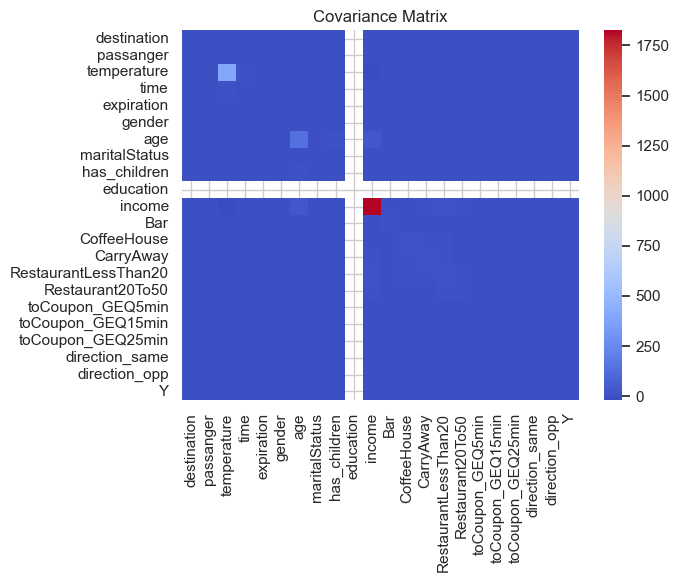

/var/folders/bj/d673kqjd2jd8jzxtbh2xz2_w0000gn/T/ipykernel_7430/1310895107.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df_numeric.corr()


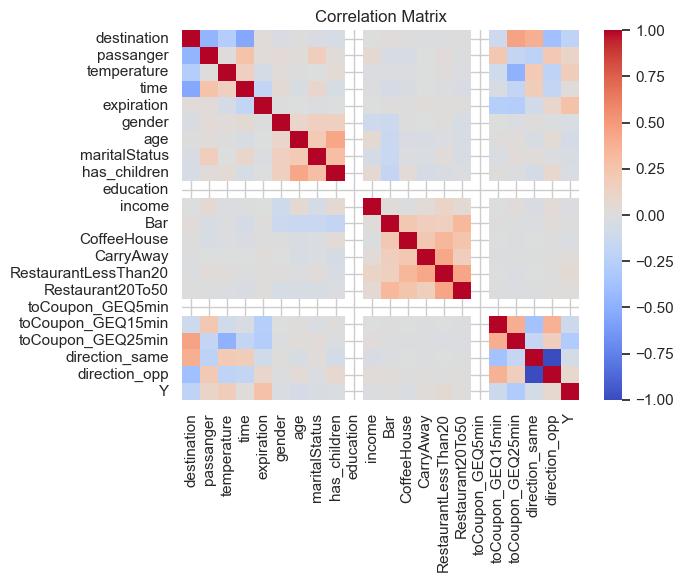

In [251]:
for column, mapping in column_mappings.items():
    df_numeric[column]=df_1[column].map(mapping)

# Compute the covariance and correlation matrix
cov_matrix = df_numeric.cov()
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm')
plt.title('Covariance Matrix')
plt.show()

cor_matrix = df_numeric.corr()
sns.heatmap(cor_matrix, annot=False, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()


# Observation from correlation and covariance visualization:

1. The covariance matrix was not helpful, because of the number scale difference.
2. The correlation matrix heatmap was much more insightful.  here are a few key insight from the correlation matrix
- the expiration, temperature, the direction, the passenger, are the key driving factors for this RestaurantLessThan20  coupon acceptance. Next are the destination, and "toCoupon_GEQ25min" 
- Gender, age, income, marritalstatus, haskids did not have a major impact on coupon acceptance


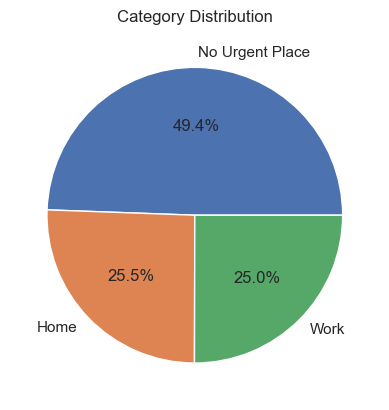

In [183]:
# further explore data 
#Pie chart is great to show distribution of percentage of each bucket
# half of drivers are going home + work, the other are going to no-urgent place
category_counts = df['destination'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Destination Distribution')
plt.show()



In [270]:
# Group the data based on the 'Destination' column and calculate the sum of 'y' and 'coupon' for each group
df_1['destination'].unique()
# grouped_data = df_1.groupby(df_1['destination']).agg({'Y': 'sum', 'coupon': 'sum'})
def ratio(x):
    total =len(x)  # find the group total
    ratio= x['Y'].sum()/total
    return(ratio)


ratio_home = ratio(df_numeric[df_numeric['destination']==2])

ratio_Work = ratio( df_numeric[df_numeric['destination']==3])

ratio_Nourgent = ratio(df_numeric[df_numeric['destination']==1])

print('Acceptance Ratio for going home, work, non urgent places are ',ratio_home, ratio_Work, ratio_Nourgent)

Acceptance Ratio for going home, work, non urgent places are  0.5576519916142557 0.5875912408759124 0.7942260442260443


# Observation on destination impact 
It was not clear from the correlation matrix how the destination impact the acceptance of coupon
But the detailed ratio calculation revealed that 
#### -when people are not hurrying home or to work, they have a much higher  coupone acceptance rate (79%), vs the 55%- 58% 

age
18    0.737288
21    0.738095
26    0.741874
31    0.708134
36    0.647687
41    0.716049
46    0.750000
55    0.639474
dtype: float64


Text(0.5, 1.0, ' Coupon acceptance by age')

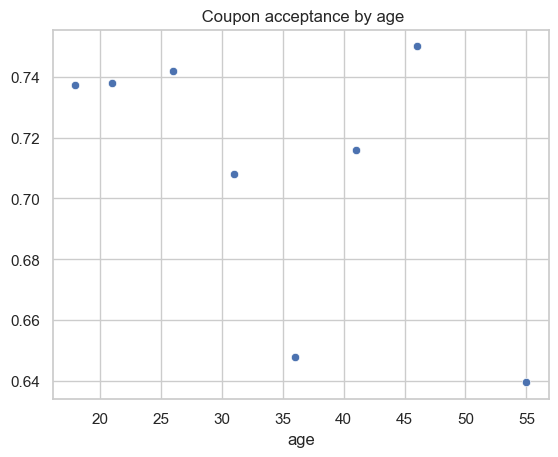

In [229]:

result = df_numeric.groupby('age').apply(ratio)
print(result)
sns.scatterplot(x=result.index, y=result.values)
plt.title(' Coupon acceptance by age')


# observation on impact of age for the coupon acceptance
It is also not clear from the correlation matrix, how/If age impacted the coupon acceptance
From the breakdown, we see the overall it is not a big swing factor, the only exception is the age 35 group are relatively less likely to get the coupons than the rest of the age groups

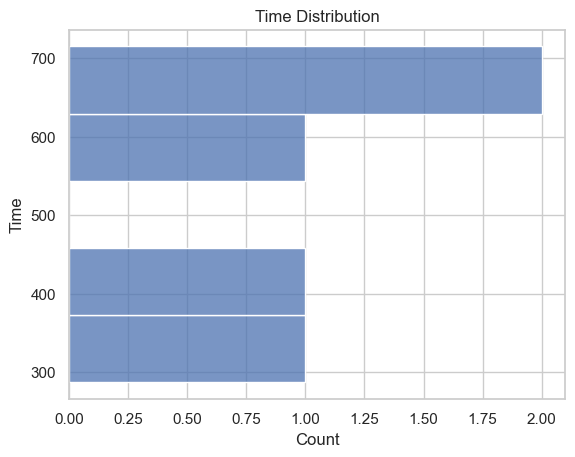

In [232]:
category_counts = df_1['time'].value_counts()

sns.histplot(data=df_1, y=category_counts, bins=len(category_counts))

plt.title('Time Distribution')
plt.xlabel('Count')
plt.ylabel('Time')

plt.show()

#### note the data here is not exactly telling. besice the spike for the first group

RestaurantLessThan20
0.0     0.627907
0.5     0.676471
2.0     0.704607
6.0     0.719276
12.0    0.760417
dtype: float64


Text(0.5, 1.0, ' Coupon acceptance by RestaurantLessThan20 ')

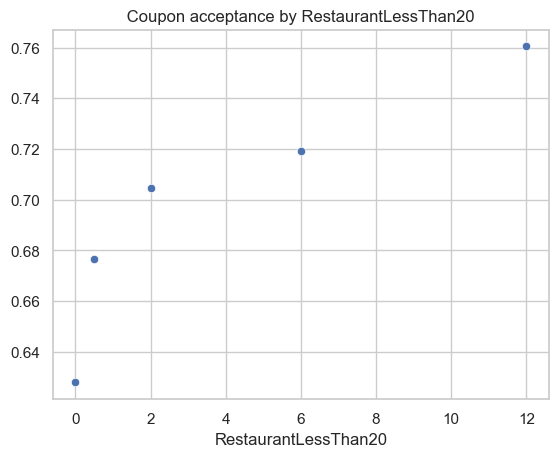

In [252]:
result = df_numeric.groupby('RestaurantLessThan20').apply(ratio)
print(result)
sns.scatterplot(x=result.index, y=result.values)
plt.title(' Coupon acceptance by RestaurantLessThan20 ')

CarryAway
0.0     0.785714
0.5     0.605670
2.0     0.740102
6.0     0.717105
12.0    0.708824
dtype: float64


Text(0.5, 1.0, ' Coupon acceptance by CarryAway')

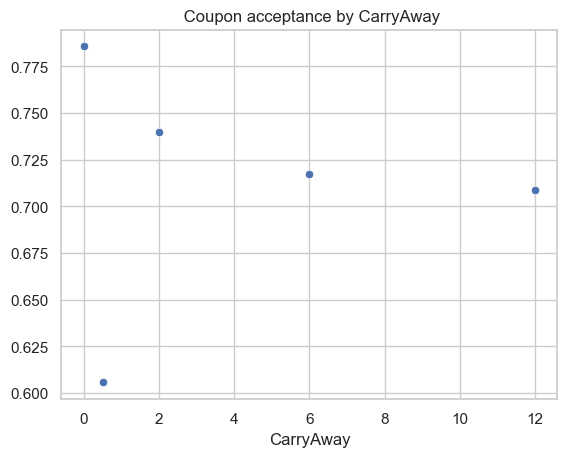

In [253]:
result = df_numeric.groupby('CarryAway').apply(ratio)
print(result)
sns.scatterplot(x=result.index, y=result.values)
plt.title(' Coupon acceptance by CarryAway')

Restaurant20To50
0.0     0.688453
0.5     0.693925
2.0     0.754745
6.0     0.698795
12.0    0.694915
dtype: float64


Text(0.5, 1.0, ' Coupon acceptance by Restaurant20To50 ')

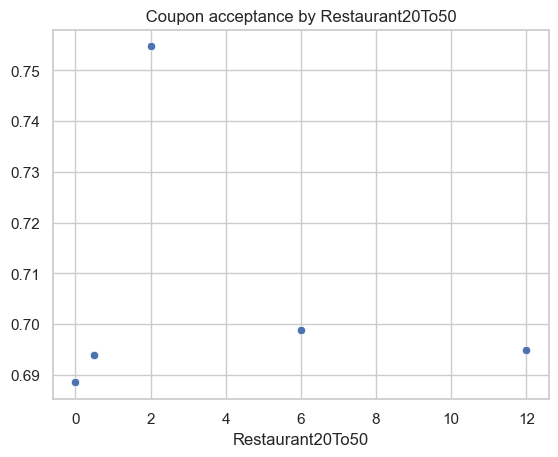

In [255]:
result = df_numeric.groupby('Restaurant20To50').apply(ratio)
print(result)
sns.scatterplot(x=result.index, y=result.values)
plt.title(' Coupon acceptance by Restaurant20To50 ')

CoffeeHouse
0.0     0.680064
0.5     0.700000
2.0     0.764622
6.0     0.723757
12.0    0.629032
dtype: float64


Text(0.5, 1.0, ' Coupon acceptance by CoffeeHouse')

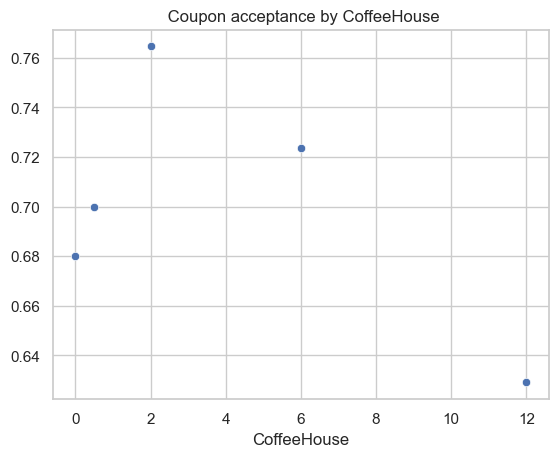

In [256]:
result = df_numeric.groupby('CoffeeHouse').apply(ratio)
print(result)
sns.scatterplot(x=result.index, y=result.values)
plt.title(' Coupon acceptance by CoffeeHouse')

# Observations for the coupon acceptance on their dine out behavior
  The correlation matrix was a little hard to see if the people's usual dining out behavior impact their acceptance of the coupon.  We saw earlier for the peopel who normally go to the bar, they are much more likely to take the Bar coupon.   
    - Here a saw a slight correlation of people who usually dine in this price range, the likelyhood of their accepting the coupon increases if their going out is more 
    - It was a bit surprising to see the other dining out like carry-away, eat in a more expensive restaurant, coffee. behavior barely have any correlation with the likelihood if they accept the coupon. 
    

temperature
30    0.537285
55    0.730586
80    0.759840
dtype: float64


Text(0.5, 1.0, ' Coupon acceptance by temperature')

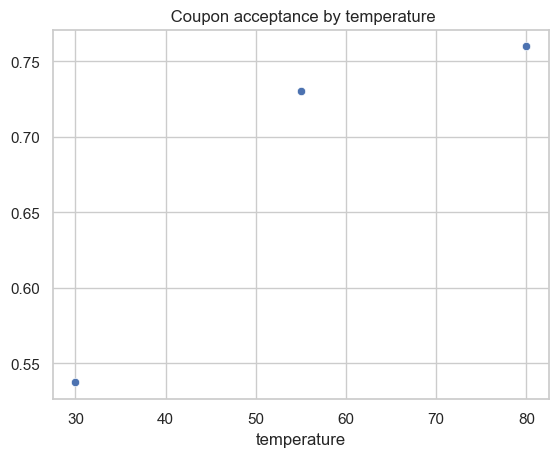

In [233]:
result = df_numeric.groupby('temperature').apply(ratio)
print(result)
sns.scatterplot(x=result.index, y=result.values)
plt.title(' Coupon acceptance by temperature')


expiration
1    0.588538
2    0.835913
dtype: float64


Text(0.5, 1.0, ' Coupon acceptance by expiration ')

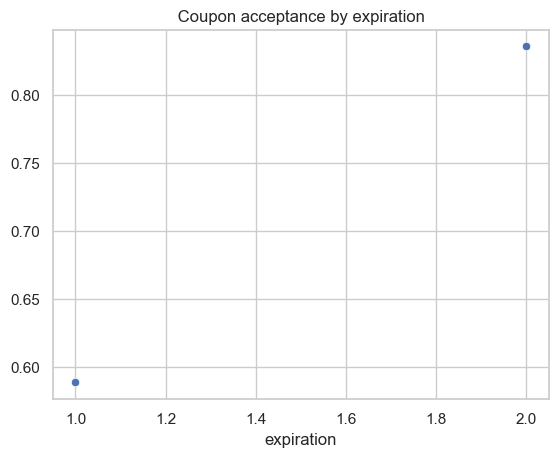

In [234]:
result = df_numeric.groupby('expiration').apply(ratio)
print(result)
sns.scatterplot(x=result.index, y=result.values)
plt.title(' Coupon acceptance by expiration ')


# observation on the Expiration and temperature
 The Observation and temperature showed as the high correlation features to the accepting coupon
 It is good to see how the numbers really show the difference here here.
  
temperature
30    0.537285
55    0.730586
80    0.759840

expiration expiration_map={'1d':2, '2h':1}
1    0.588538
2    0.835913



In [246]:
# as a fun exercise, I want to see if I can find the the group that has the highest acceptance combo
group_1day =df_numeric[df_numeric['expiration'] == 2]
group_2hr = df_numeric[df_numeric['expiration']== 1]
# print(group_1day.info())

result = group_1day.groupby('temperature').apply(ratio)
print(result)
result_1 = group_2hr.groupby([ 'temperature']).apply(ratio)
print(result_1)

temperature
30    0.738197
55    0.863747
80    0.853395
dtype: float64
temperature
30    0.375862
55    0.481818
80    0.688602
dtype: float64


# Final fun oberservation: the top combo that accept the coupon
 
temperature vs acceptance rate for the 1 day coupon
30    0.738197
55    0.863747
80    0.853395
dtype: float64
temperature vs acceptance rate  for the 2hr coupon
30    0.375862
55    0.481818
80    0.688602
dtype: float64

#### So the winner is  the" 1 day coupon + temp =55 " combination,  with 86.4% acceptance ratio !!!
